# Defining Directories and categories first print data

[[247 255 251 ... 174 183 192]
 [246 250 255 ... 190 197 206]
 [248 247 255 ... 193 199 205]
 ...
 [166 160 157 ... 214 202 192]
 [167 162 159 ... 226 212 200]
 [167 163 162 ... 240 224 209]]


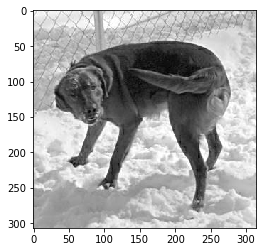

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pandas as pd
from keras.utils import np_utils

TRAIN_DATADIR = "/home/reinaldo/Documentos/PetImages/database/"
TEST_DATADIR = "/home/reinaldo/Documentos/PetImages/"
CATEGORIES = ["Dog", "Cat"]
img_array = []


for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(TRAIN_DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        print(img_array)
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [2]:
print(img_array)

[[247 255 251 ... 174 183 192]
 [246 250 255 ... 190 197 206]
 [248 247 255 ... 193 199 205]
 ...
 [166 160 157 ... 214 202 192]
 [167 162 159 ... 226 212 200]
 [167 163 162 ... 240 224 209]]


In [3]:
print(img_array.shape)

(307, 315)


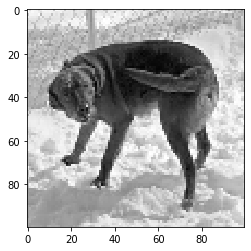

(100, 100)


In [4]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
new_array2 = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.imshow(new_array2, cmap='gray')
plt.show()
print(new_array.shape)

# Create training and test data

In [5]:
training_data = []
test_data = []
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path_train = os.path.join(TRAIN_DATADIR,category)  # create path to dogs and cats to train
        path_test = os.path.join(TEST_DATADIR,category)  # create path to dogs and cats to test
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path_train)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path_train,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num, int(img.split('.')[0])])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
        for img in tqdm(os.listdir(path_test)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path_test,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array2 = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                test_data.append([new_array2, class_num,int(img.split('.')[0])])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass            
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))
print(len(test_data))
print(training_data)


100%|██████████| 12501/12501 [00:10<00:00, 1169.93it/s]


200
24946
[[array([[250, 222, 248, ..., 189, 159, 196],
       [248, 241, 248, ..., 168, 174, 189],
       [205, 244, 244, ..., 192, 178, 200],
       ...,
       [171, 171, 159, ..., 196, 204, 212],
       [167, 160, 160, ..., 203, 204, 208],
       [162, 161, 168, ..., 231, 230, 213]], dtype=uint8), 0, 420], [array([[130, 117, 130, ..., 139, 140, 134],
       [125, 133, 133, ..., 148, 145, 129],
       [139, 137, 140, ..., 144, 134, 129],
       ...,
       [119,  99, 117, ..., 117, 135, 120],
       [111, 104, 108, ...,  99, 102, 111],
       [112, 116,  91, ...,  91,  91,  95]], dtype=uint8), 0, 422], [array([[ 89, 111, 110, ..., 142, 143, 137],
       [ 94, 102, 122, ..., 134, 140, 139],
       [ 98,  92, 104, ..., 126, 139, 144],
       ...,
       [ 46,  68,  75, ...,  55,  88,  81],
       [ 66,  34,  79, ...,  43,  78,  79],
       [ 71,  33,  84, ...,  44,  60,  83]], dtype=uint8), 0, 485], [array([[159, 142, 134, ..., 210, 203, 201],
       [130, 131, 133, ..., 201, 198, 199

In [6]:
import random

random.shuffle(training_data)
random.shuffle(test_data)

# Reshape training and test data

In [7]:
X_test = []
X_train = []
y_test = []
y_train = []
z_train = []
z_test = []

for features,label,file_name in training_data:
    X_train.append(features)
    y_train.append(label)
    z_train.append(file_name)

print(X_train[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

for features,label,file_name in test_data:
    X_test.append(features)
    y_test.append(label)
    z_test.append(file_name)

#print(X_test[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[149]
   [153]
   [151]
   ...
   [144]
   [154]
   [139]]

  [[148]
   [151]
   [149]
   ...
   [144]
   [146]
   [143]]

  [[155]
   [153]
   [149]
   ...
   [148]
   [144]
   [138]]

  ...

  [[150]
   [152]
   [150]
   ...
   [ 98]
   [ 96]
   [128]]

  [[148]
   [148]
   [150]
   ...
   [125]
   [137]
   [138]]

  [[147]
   [151]
   [154]
   ...
   [139]
   [134]
   [139]]]]


In [8]:
import pickle

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test,pickle_out)

pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train,pickle_out)

pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()


# Saving data on pickle files

In [9]:
#We can always load it in to our current script, or a totally new one by doing:

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

# Apply data on first training machine

In [10]:
import tensorflow as tf
#from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import keras

import pickle

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

y_test = np_utils.to_categorical(y_test,2)
y_train = np_utils.to_categorical(y_train,2)

X_train = X_train/255.0
X_test = X_test/255.0

model = Sequential()

model.add(Conv2D(20, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(20, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(20))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])
print("reinaldo")
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.3)
#print("score of the model test:")
#score = model.evaluate(X_test, y_test, verbose=0)
#print(score)
print("Calculating prediction")
prediction = model.predict(X_test, batch_size=1)
print(prediction)
print("done")


W0729 17:44:16.965545 140363546154624 deprecation.py:506] From /home/reinaldo/masters/ai/.venv/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


reinaldo
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 5ms/sample - loss: 1.5628 - categorical_accuracy: 0.4786 - val_loss: 0.8702 - val_categorical_accuracy: 0.5500
Epoch 2/5
140/140 [==============================] - 1s 5ms/sample - loss: 0.8697 - categorical_accuracy: 0.4143 - val_loss: 0.8841 - val_categorical_accuracy: 0.4500
Epoch 3/5
140/140 [==============================] - 1s 5ms/sample - loss: 0.6829 - categorical_accuracy: 0.5286 - val_loss: 0.7053 - val_categorical_accuracy: 0.4333
Epoch 4/5
140/140 [==============================] - 1s 4ms/sample - loss: 0.6345 - categorical_accuracy: 0.7786 - val_loss: 0.6922 - val_categorical_accuracy: 0.5333
Epoch 5/5
140/140 [==============================] - 1s 5ms/sample - loss: 0.5808 - categorical_accuracy: 0.8000 - val_loss: 0.7254 - val_categorical_accuracy: 0.5000
Calculating prediction
[[0.6486017  0.35139826]
 [0.5900771  0.40992287]
 [0.5999324  0.4000676 ]
 ...
 [0.7107

# sorting the predictions without lose index 

In [11]:
pred_index = np.argsort(prediction)

#print(S_pred)
print(type(prediction[:1]))
print(prediction)
print(prediction.shape)
    

<class 'numpy.ndarray'>
[[0.6486017  0.35139826]
 [0.5900771  0.40992287]
 [0.5999324  0.4000676 ]
 ...
 [0.7107981  0.28920192]
 [0.40491894 0.5950811 ]
 [0.5336249  0.46637508]]
(24946, 2)


In [12]:
from numpy.random import rand
testando = [rand(2), rand(2), rand(2)]
testando=np.array(testando)
testando_value = np.sort(testando,axis=1)
testando_index = np.argsort(testando)
print(testando_value)
print(testando_index)

[[0.23797855 0.50881481]
 [0.29302569 0.79806767]
 [0.22604259 0.88061871]]
[[0 1]
 [0 1]
 [1 0]]


In [13]:
pre = prediction
print(pre)
print(pre.shape)
print(z_test)

[[0.6486017  0.35139826]
 [0.5900771  0.40992287]
 [0.5999324  0.4000676 ]
 ...
 [0.7107981  0.28920192]
 [0.40491894 0.5950811 ]
 [0.5336249  0.46637508]]
(24946, 2)
[9933, 3189, 10875, 11532, 3406, 11596, 4963, 5050, 10408, 9890, 1333, 3255, 826, 10483, 8828, 8844, 1165, 10978, 6241, 7113, 4775, 8359, 11858, 3181, 2720, 8552, 6730, 854, 10346, 8513, 9207, 3165, 10931, 6967, 5877, 8519, 9314, 5981, 7131, 12008, 470, 5772, 9945, 7801, 3875, 11922, 10532, 1336, 11970, 10925, 12382, 3230, 4668, 12225, 1782, 9738, 6543, 7608, 10329, 9530, 9145, 930, 12306, 4805, 5357, 4103, 7915, 6814, 12498, 6681, 11238, 1297, 9851, 2477, 10555, 2975, 3865, 5569, 5994, 7938, 426, 9334, 9682, 2854, 6870, 2385, 3231, 9868, 1112, 6609, 534, 4506, 4686, 7638, 12053, 519, 939, 5018, 864, 8592, 5201, 11344, 11806, 5334, 5792, 1054, 10836, 316, 1512, 11243, 12241, 7078, 7434, 9723, 7327, 10849, 3172, 4655, 1390, 6423, 8641, 11378, 5585, 616, 2198, 7764, 10314, 8520, 7170, 11098, 8834, 2009, 7976, 2177, 1128, 39

In [14]:
pre = prediction

label_pred = np.insert(pre, 2, z_test , axis =1)

print(label_pred)
print(label_pred.shape)

[[6.4860171e-01 3.5139826e-01 9.9330000e+03]
 [5.9007710e-01 4.0992287e-01 3.1890000e+03]
 [5.9993237e-01 4.0006760e-01 1.0875000e+04]
 ...
 [7.1079808e-01 2.8920192e-01 1.3440000e+03]
 [4.0491894e-01 5.9508109e-01 1.0507000e+04]
 [5.3362489e-01 4.6637508e-01 7.6470000e+03]]
(24946, 3)


In [15]:
#cat_sorte = np.sort(label_pred, axis = 0)[::-1]
cat_sort = label_pred[label_pred[:,0].argsort()]
print(cat_sort[::-1])

[[9.49326396e-01 5.06735966e-02 1.64600000e+03]
 [8.85510623e-01 1.14489317e-01 6.89700000e+03]
 [8.84017169e-01 1.15982816e-01 1.20040000e+04]
 ...
 [1.75752491e-01 8.24247539e-01 1.47500000e+03]
 [1.67232633e-01 8.32767367e-01 1.01610000e+04]
 [1.55871078e-01 8.44128907e-01 8.00600000e+03]]


#odenar e escolher 100 melhores de cada categoria mo